# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [0]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       coef=True)

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

In [10]:
y.shape

(100,)

We are fitting a model with an intercept. Lets see what it is.

In [11]:
coef

array(80.88336208)

We can plot the data.

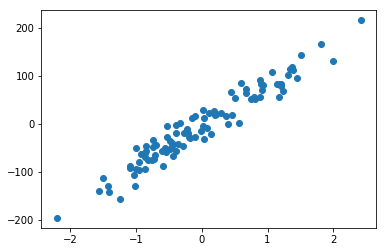

In [12]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [0]:
xgrid = np.linspace(-2.5,2.5,1000)
xgrid

In [0]:
Xgrid = xgrid.reshape(-1,1)
Xgrid

## Fit using sklearn

In [0]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([82.90456142]), -3.709228868670302)

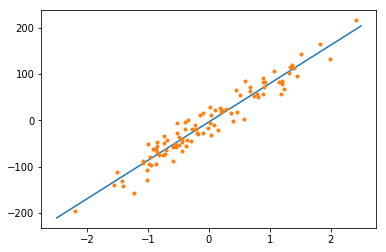

In [18]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [0]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y, lr.predict(X))

0.9342344891672815

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [22]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

array([52,  7, 20, 26, 32, 11,  0, 58,  4, 87, 37, 75, 57, 13, 38,  5, 31,
       21, 78, 56])

In [0]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [24]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)

(0.9328107874688009, 0.9328107874688009)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

(0.7, 1)

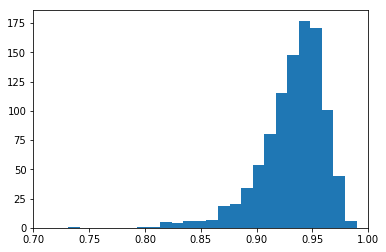

In [25]:
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

In [0]:
# your code here
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=400,
                       random_state=2017,
                       coef=True)


In [28]:
# your code here
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([121.30734871]), -74.18457737340603)

array([69.89957701])

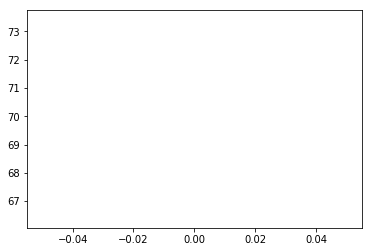

In [41]:
plt.plot(lr.coef_)
lr.coef_

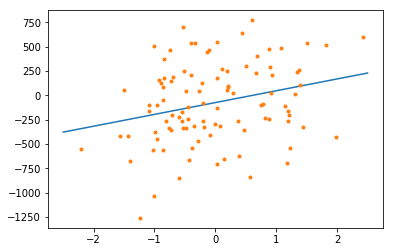

In [29]:
# your code here
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [30]:
# your code here
r2_score(y,lr.predict(X))


0.07066243043021647

In [31]:
# your code here
sample_indices = np.random.choice(range(100), size=20)
sample_indices


array([47, 18,  0, 98, 49, 22, 97,  5,  0, 43, 49, 93, 72, 47, 19, 74,  7,
       74, 25, 82])

In [0]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

No handles with labels found to put in legend.


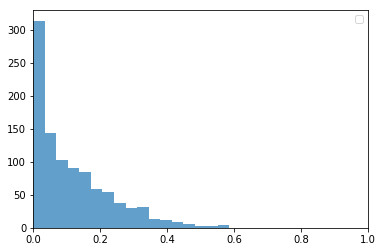

In [49]:
scores = []
coef = []
lr = LinearRegression()
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    lr.fit(Xsample, ysample)
    scores.append(lr.score(Xsample, ysample))
    coef.append(lr.coef_)
plt.hist(scores,  bins=np.linspace(0, 1, 30),alpha=0.7)
plt.xlim(0,1)
plt.legend()

([array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0.

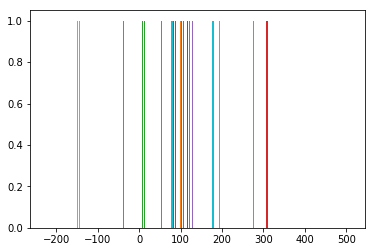

In [46]:
plt.hist(coef)

## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [0]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [0]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [0]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

In [0]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

In [0]:
plt.plot(history.history['loss'])

In [0]:
lr3.get_weights()

### Using the Keras Functional API



In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

In [0]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

In [0]:
m.get_weights()